# <center> Dataset - Document Category  </center>

In [2]:
from sklearn import datasets
from sklearn import svm
import pandas as pd
from numpy import genfromtxt
# Stemming purposes
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

# Splitting Dataset
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

from sklearn import metrics
import numpy as np
import itertools
#Helper

import matplotlib.pyplot as plt


#PLOT Matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('')
#         print('Confusion matrix, with little normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.rcParams['figure.figsize'] = [10, 10]
    plt.show()

# <center>  Dataset Parse </center>

In [3]:

data_set = pd.read_csv("document.csv")


print(data_set.shape)

print(data_set.head())

outputClass = list(set(data_set.label))
print('no of class:')
print(len(outputClass))

print('Output Class:')
print('\n'.join([a for a in outputClass]))


(5000, 3)
   index                                               text          label
0      0  বাড়ি বদলাতে গিয়েই মান্না দের মেয়ে সুমিতা দে ও ...  entertainment
1      1  গ্লিটজকে শাবনূর বললেন, “নিন্দুকরা নানা কথা রটি...  entertainment
2      2  এই বিষয়ে রাজধানী’র রেনেসাঁ হাসপাতালের মেডিকেল ...  entertainment
3      3  মরণব্যাধি ক্যানসারের সঙ্গে ১১ মাস যুদ্ধ শেষে ম...  entertainment
4      4  রাজা ও রানি পথনাটক নাট্যদল: নাগরিক নাট্যাঙ্গন ...  entertainment
no of class:
12
Output Class:
science_tech
crime
international
environment
economics
entertainment
education
opinion
sports
art
politics
accident


# <center> Stemming Text </center>

In [4]:
# print(data_set.text)

text = data_set.text
verdict = data_set.label

# <center>  Splitting Dataset </center>

In [5]:
X_train, X_test, y_train, y_test = train_test_split(text, verdict, test_size=0.3, random_state=53)
print("Dataset Splitted.")

Dataset Splitted.


# <center>  Applying TF-IDF </center>

In [6]:
count_vectorizer = CountVectorizer(stop_words='english')
count_train = count_vectorizer.fit_transform(X_train) 
count_test = count_vectorizer.transform(X_test)

tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7) 
tfidf_train = tfidf_vectorizer.fit_transform(X_train) 
tfidf_test = tfidf_vectorizer.transform(X_test)

print("TF-IDF Training Started\n->->->")
# print(tfidf_train)
print("TF-IDF Training Ended")

TF-IDF Training Started
->->->
TF-IDF Training Ended


# <center>  Feature Extract </center>

In [8]:
print('Sample features names\n',tfidf_vectorizer.get_feature_names()[1500:1600:5], '\n')
# print(count_vectorizer.get_feature_names()[900:910])

feature_arr = tfidf_vectorizer.get_feature_names()

for i in range(1500, 1600, 5):
    val = tfidf_vectorizer.vocabulary_[feature_arr[i]]
    print(feature_arr[i] , " ----> " , val)
# print(tfidf_vectorizer)

Sample features names
 ['isn', 'iub', 'jahangirnagar', 'jarigan', 'jiazu', 'jobs', 'jorge', 'joys', 'jubilant', 'julius', 'jungle', 'kamal', 'kazakhstan', 'khaiyber', 'kill', 'kindling', 'kishoreganj', 'known', 'lachmann', 'land'] 

isn  ---->  1500
iub  ---->  1505
jahangirnagar  ---->  1510
jarigan  ---->  1515
jiazu  ---->  1520
jobs  ---->  1525
jorge  ---->  1530
joys  ---->  1535
jubilant  ---->  1540
julius  ---->  1545
jungle  ---->  1550
kamal  ---->  1555
kazakhstan  ---->  1560
khaiyber  ---->  1565
kill  ---->  1570
kindling  ---->  1575
kishoreganj  ---->  1580
known  ---->  1585
lachmann  ---->  1590
land  ---->  1595


In [9]:
tfidf_df = pd.DataFrame(tfidf_train.A, columns=tfidf_vectorizer.get_feature_names())
# print(tfidf_df.tail())

# <center> Random Forest Classifier </center>

Accuracy:   56.00%



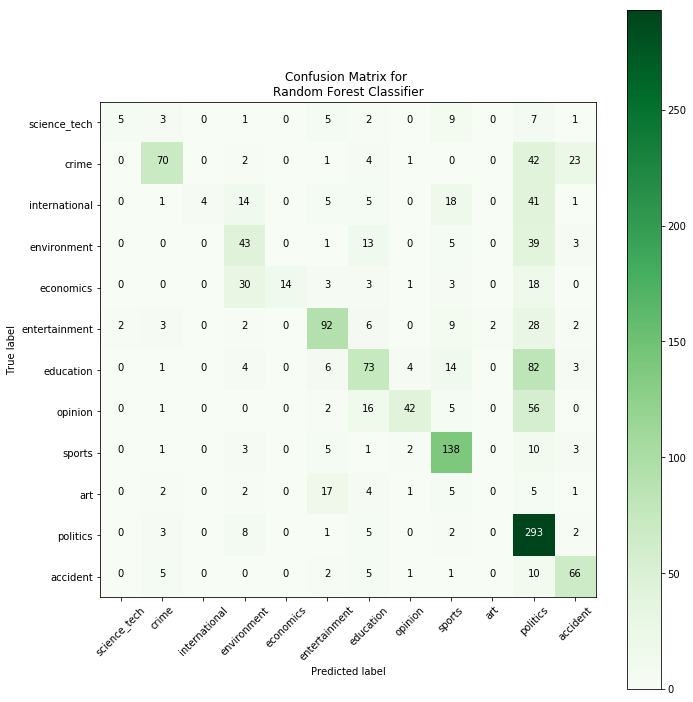

In [13]:
from sklearn.ensemble import RandomForestClassifier

clf_rand = RandomForestClassifier(n_estimators = 150 , criterion = 'entropy' , random_state = 0)

clf_rand.fit(tfidf_train, y_train)

pred_rand = clf_rand.predict(tfidf_test)

score = metrics.accuracy_score(y_test, pred_rand)

print("Accuracy:   %0.2f" % (score*100.) + "%")

cm = metrics.confusion_matrix(y_test, pred_rand, labels=outputClass)
plot_confusion_matrix(cm, 
                      classes=outputClass, 
                      title="Confusion Matrix for \nRandom Forest Classifier",
                      cmap = plt.cm.Greens
                     )

# <center> Naive Bayes </center>

Accuracy:   33.67%



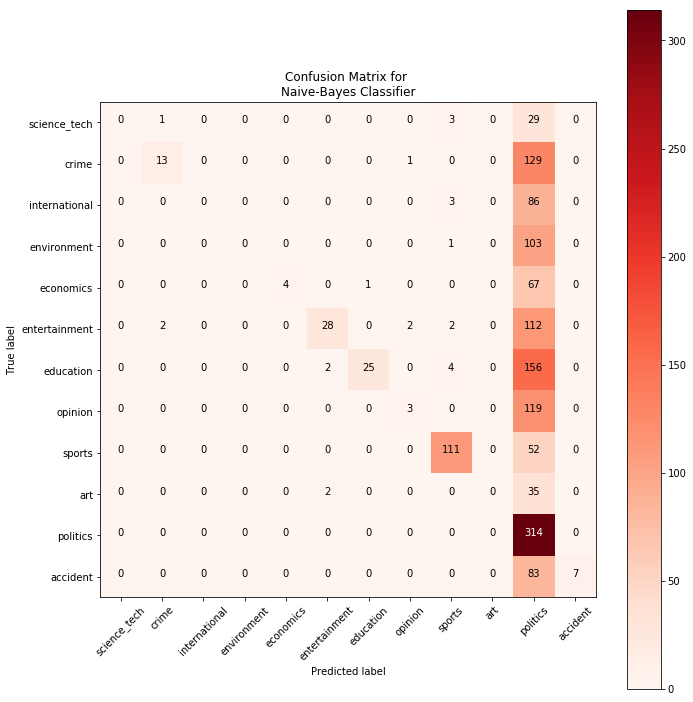

In [14]:
from sklearn.naive_bayes import MultinomialNB
import itertools

naive_classifier = MultinomialNB()
naive_classifier.fit(tfidf_train, y_train)
pred_tree = naive_classifier.predict(tfidf_test)

score = metrics.accuracy_score(y_test, pred_tree)
print("Accuracy:   %0.2f" % (score*100.) + "%")
cm = metrics.confusion_matrix(y_test, pred_tree, labels=outputClass)
plot_confusion_matrix(cm, 
                      classes=outputClass, 
                      title="Confusion Matrix for \nNaive-Bayes Classifier",
                      cmap = plt.cm.Reds
                     )

# <center>  SVM Classifier </center>

Accuracy:   57.20%



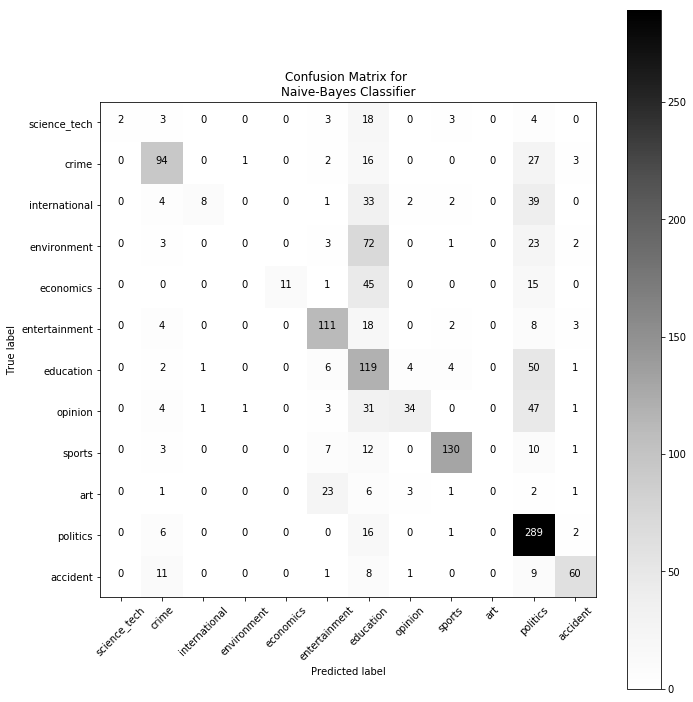

In [15]:
from sklearn import svm

clf_svm = svm.SVC(probability=True, C=1000)

clf_svm.fit(tfidf_train, y_train)
pred_svm = clf_svm.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred_svm)
print("Accuracy:   %0.2f" % (score*100.) + "%")
cm = metrics.confusion_matrix(y_test, pred_svm, labels=outputClass)
plot_confusion_matrix(cm, 
                      classes=outputClass, 
                      title="Confusion Matrix for \nNaive-Bayes Classifier",
                      cmap = plt.cm.Greys
                     )